# A model for math and reading proficiency in US school districts from 2009-2017

## Introduction

Individuals with low reading proficiency are more likely to drop-out of high school, to end up in the criminal justice system, and to live in poverty. Even more, the lack of high school education is a powerful predictor of mortality variation among US states and high school dropouts make up disproportionately higher percentages of the nation’s institutionalized population than of the nation’s noninstitutionalized population, so low achievement in math and reading proficiency could be the start of a much larger issue.

To understand the different levels of proficiency, we used features X, Y, Z in various models with the intent to answer the question of how does instructional spend from 2009-2016 spend impact math and reading proficiency amongst different demographics (e.g., race, gender, and socioeconomic status), as we hypothesize that achievement is determined by instructional expenditure.

Our findings show that: i) xxxxxxxx, ii) xxxxxxx, and iii) xxxxxx. 


## Education Data Models

This notebook contains two models that predict educational outcomes based on instructional spend per district from 2009 to 2018. We use using publically available data by the Education Department.
The following featues are included:
- gender
- grade
- race

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Financial Data
This dataframe  contains district level finance data including revenues from federal, state, and local governments and expenditures.

In [3]:
finance_df = pd.read_csv("financial/districts_ccd_finance.csv.gz",compression='gzip')

In [4]:
finance_df.head(5)

,year,leaid,fips,censusid,rev_total,rev_fed_total,rev_fed_child_nutrition_act,rev_fed_state_title_i,rev_fed_state_idea,rev_fed_state_math_sci_teach,...,debt_longterm_issued_FY,debt_longterm_retired_FY,debt_longterm_outstand_end_FY,debt_shortterm_outstand_beg_FY,debt_shortterm_outstand_end_FY,assets_sinking_fund,assets_bond_fund,assets_other,enrollment_fall_responsible,enrollment_fall_school
0,1991,100005,1.0,15048401.0,11265000.0,1012000.0,285000,413000,140000,10000,...,0.0,0,0.0,0,0.0,0,0.0,732000.0,3084.0,NaN
1,1991,100006,1.0,15048001.0,22855000.0,2009000.0,854000,671000,249000,18000,...,0.0,2000,12385000.0,0,0.0,370000,1679000.0,511000.0,6139.0,NaN
2,1991,100007,1.0,15037401.0,36812000.0,651000.0,179000,99000,286000,6000,...,44159000.0,260000,53960000.0,0,0.0,0,30420000.0,3816000.0,6328.0,NaN
3,1991,100030,1.0,15062002.0,14397000.0,1014000.0,279000,447000,136000,12000,...,5353000.0,192000,6449000.0,0,0.0,0,2005000.0,2619000.0,3783.0,NaN
4,1991,100060,1.0,15020001.0,7768000.0,948000.0,247000,295000,295000,8000,...,0.0,0,0.0,0,0.0,0,0.0,144000.0,2154.0,NaN


In [65]:
# only keep columns we are interested in
finance_df = finance_df[['year', 'leaid', 'fips', 'censusid', 'rev_total', 'exp_total', 
                                             'exp_current_instruction_total', 'enrollment_fall_responsible']]
print(finance_df.columns.tolist())

['year', 'leaid', 'fips', 'censusid', 'rev_total', 'exp_total', 'exp_current_instruction_total', 'enrollment_fall_responsible']


In [66]:
finance_df = finance_df[finance_df.year > 2008]

In [67]:
finance_df.head(5)

,year,leaid,fips,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
258542,2009,0100002,1.0,-2.000000e+00,-2.0,-2.0,-2.0,0.0
258543,2009,0100005,1.0,1.504840e+12,38927000.0,57286000.0,20908000.0,4104.0
258544,2009,0100006,1.0,1.504800e+12,57766000.0,57101000.0,29908000.0,5777.0
258545,2009,0100007,1.0,1.503740e+12,149924000.0,152411000.0,83430000.0,12889.0
258546,2009,0100008,1.0,1.504530e+12,85030000.0,85734000.0,44662000.0,8654.0


## District Directory Data
This dataframe contains school district geographic and mailing information, agency type, highest and lowest grades offered, special education students and English language learners, and full-time equivalent teachers and other staff.

In [68]:
directory_2009_df = pd.read_csv("district_directory/school-districts_lea_directory_2009.csv", compression='gzip')
directory_2010_df = pd.read_csv("district_directory/school-districts_lea_directory_2010.csv", compression='gzip')
directory_2011_df = pd.read_csv("district_directory/school-districts_lea_directory_2011.csv", compression='gzip')
directory_2012_df = pd.read_csv("district_directory/school-districts_lea_directory_2012.csv", compression='gzip')
directory_2013_df = pd.read_csv("district_directory/school-districts_lea_directory_2013.csv", compression='gzip')
directory_2014_df = pd.read_csv("district_directory/school-districts_lea_directory_2014.csv", compression='gzip')
directory_2015_df = pd.read_csv("district_directory/school-districts_lea_directory_2015.csv", compression='gzip')
directory_2016_df = pd.read_csv("district_directory/school-districts_lea_directory_2016.csv", compression='gzip')
directory_2017_df = pd.read_csv("district_directory/school-districts_lea_directory_2017.csv", compression='gzip')
directory_2018_df = pd.read_csv("district_directory/school-districts_lea_directory_2018.csv", compression='gzip')

In [13]:
# missing concatenation in overall directory df
directory_df = pd.concat([directory_2009_df, directory_2010_df, directory_2011_df, directory_2012_df,
                         directory_2013_df, directory_2014_df, directory_2015_df, directory_2016_df,
                         directory_2017_df, directory_2018_df], axis=0)
directory_df.head(5)

,year,leaid,lea_name,state_leaid,street_mailing,city_mailing,state_mailing,zip_mailing,zip4_mailing,street_location,...,school_counselors_fte,teachers_ungraded_fte,spec_ed_students,english_language_learners,enrollment,cmsa,bureau_indian_education,agency_charter_indicator,migrant_students,guidance_counselors_other_fte
0,2009,100002,ALABAMA YOUTH SERVICES,210,P O BOX 66,MT MEIGS,AL,36057.0,66.0,1000 INDUSTRIAL SCHOOL RD,...,NaN,-2.0,43.0,0.0,0.0,NaN,0.0,3.0,NaN,-2.0
1,2009,100005,ALBERTVILLE CITY,101,107 WEST MAIN ST,ALBERTVILLE,AL,35950.0,25.0,107 WEST MAIN ST,...,NaN,-2.0,306.0,812.0,4104.0,NaN,0.0,3.0,NaN,-2.0
2,2009,100006,MARSHALL COUNTY,048,12380 US HIGHWAY 431 S,GUNTERSVILLE,AL,35976.0,9351.0,12380 US HWY 431 SOUTH,...,NaN,-2.0,792.0,380.0,5777.0,NaN,0.0,3.0,NaN,0.5
3,2009,100007,HOOVER CITY,158,2810 METROPOLITAN WAY,HOOVER,AL,35243.0,5500.0,2810 METROPOLITAN WAY,...,NaN,-2.0,1022.0,580.0,12889.0,NaN,0.0,3.0,NaN,-2.0
4,2009,100008,MADISON CITY,169,211 CELTIC DRIVE,MADISON,AL,35758.0,1615.0,211 CELTIC DR,...,NaN,-2.0,774.0,249.0,8654.0,NaN,0.0,3.0,NaN,-2.0


In [69]:
directory_df = directory_df[['year', 'leaid', 'lea_name', 'state_leaid','state_location', 'zip_location', 'fips', 
                             'county_code', 'county_name', 'latitude', 'longitude', 'urban_centric_locale']]

In [70]:
directory_df.head(5)

,year,leaid,lea_name,state_leaid,state_location,zip_location,fips,county_code,county_name,latitude,longitude,urban_centric_locale
0,2009,100002,ALABAMA YOUTH SERVICES,210,AL,36057.0,1.0,1101.0,MONTGOMERY COUNTY,32.376999,-86.083000,41.0
1,2009,100005,ALBERTVILLE CITY,101,AL,35950.0,1.0,1095.0,MARSHALL COUNTY,34.267872,-86.208954,32.0
2,2009,100006,MARSHALL COUNTY,048,AL,35976.0,1.0,1095.0,MARSHALL COUNTY,34.306667,-86.292007,42.0
3,2009,100007,HOOVER CITY,158,AL,35243.0,1.0,1073.0,JEFFERSON COUNTY,33.406399,-86.766701,13.0
4,2009,100008,MADISON CITY,169,AL,35758.0,1.0,1089.0,MADISON COUNTY,34.688652,-86.744812,22.0


In [17]:
edfacts_2009_df = pd.read_csv("district_edfacts/districts_edfacts_assessments_2009.csv", compression='gzip')
edfacts_2010_df = pd.read_csv("district_edfacts/districts_edfacts_assessments_2010.csv", compression='gzip')
edfacts_2011_df = pd.read_csv("district_edfacts/districts_edfacts_assessments_2011.csv", compression='gzip')
edfacts_2012_df = pd.read_csv("district_edfacts/districts_edfacts_assessments_2012.csv", compression='gzip')
edfacts_2013_df = pd.read_csv("district_edfacts/districts_edfacts_assessments_2013.csv", compression='gzip')
edfacts_2014_df = pd.read_csv("district_edfacts/districts_edfacts_assessments_2014.csv", compression='gzip')
edfacts_2015_df = pd.read_csv("district_edfacts/districts_edfacts_assessments_2015.csv", compression='gzip')
edfacts_2016_df = pd.read_csv("district_edfacts/districts_edfacts_assessments_2016.csv", compression='gzip')
edfacts_2017_df = pd.read_csv("district_edfacts/districts_edfacts_assessments_2017.csv", compression='gzip')

In [18]:

edfacts_df = pd.concat([edfacts_2009_df, edfacts_2010_df, edfacts_2011_df, edfacts_2012_df,
                         edfacts_2013_df, edfacts_2014_df, edfacts_2015_df, edfacts_2016_df,
                         edfacts_2017_df], axis=0)
edfacts_df.head(5)

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,homeless,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,200001,200001,2009,Lower Kuskokwim School District,2,99,99,99,99,99,...,99,99,2305.0,46.0,46.0,46.0,2297.0,37.0,37.0,37.0
1,200001,200001,2009,Lower Kuskokwim School District,2,99,5,99,99,99,...,99,99,2190.0,44.0,44.0,44.0,2182.0,35.0,35.0,35.0
2,200001,200001,2009,Lower Kuskokwim School District,2,99,4,99,99,99,...,99,99,9.0,50.0,100.0,75.0,9.0,50.0,100.0,75.0
3,200001,200001,2009,Lower Kuskokwim School District,2,99,2,99,99,99,...,99,99,4.0,-3.0,-3.0,-3.0,4.0,-3.0,-3.0,-3.0
4,200001,200001,2009,Lower Kuskokwim School District,2,99,99,99,99,99,...,99,99,321.0,14.0,14.0,14.0,321.0,13.0,13.0,13.0


In [19]:
print(edfacts_df.columns.tolist())

['leaid', 'leaid_num', 'year', 'lea_name', 'fips', 'grade_edfacts', 'race', 'sex', 'lep', 'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected', 'read_test_num_valid', 'read_test_pct_prof_low', 'read_test_pct_prof_high', 'read_test_pct_prof_midpt', 'math_test_num_valid', 'math_test_pct_prof_low', 'math_test_pct_prof_high', 'math_test_pct_prof_midpt']


In [20]:
edfacts_df = edfacts_df[['leaid', 'leaid_num', 'year', 'lea_name', 'fips', 'grade_edfacts', 'race', 'sex', 'lep', 
                         'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected', 
                         'read_test_num_valid', 'read_test_pct_prof_low', 'read_test_pct_prof_high', 
                         'read_test_pct_prof_midpt', 'math_test_num_valid', 'math_test_pct_prof_low', 
                         'math_test_pct_prof_high', 'math_test_pct_prof_midpt']]

### Not sure we need enrollment df when race is included in edfacts (I'm using it, but calling it out)

In [21]:
enrollment_2009_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2009.csv", compression='gzip')
enrollment_2010_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2010.csv", compression='gzip')
enrollment_2011_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2011.csv", compression='gzip')
enrollment_2012_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2012.csv", compression='gzip')
enrollment_2013_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2013.csv", compression='gzip')
enrollment_2014_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2014.csv", compression='gzip')
enrollment_2015_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2015.csv", compression='gzip')
enrollment_2016_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2016.csv", compression='gzip')
enrollment_2017_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2017.csv", compression='gzip')
enrollment_2018_df = pd.read_csv("district_enrollment/schools_ccd_lea_enrollment_2018.csv", compression='gzip')

In [22]:

enroll_df = pd.concat([enrollment_2009_df, enrollment_2010_df, enrollment_2011_df, enrollment_2012_df,
                         enrollment_2013_df, enrollment_2014_df, enrollment_2015_df, enrollment_2016_df,
                         enrollment_2017_df, enrollment_2018_df], axis=0)
enroll_df.head(5)

,year,leaid,fips,grade,race,sex,enrollment
0,2009,100002,1,3,1,1,0.0
1,2009,100002,1,3,1,2,0.0
2,2009,100002,1,3,1,99,0.0
3,2009,100002,1,3,2,1,0.0
4,2009,100002,1,3,2,2,0.0
5,2009,100002,1,3,2,99,0.0
6,2009,100002,1,3,3,1,0.0
7,2009,100002,1,3,3,2,0.0
8,2009,100002,1,3,3,99,0.0
9,2009,100002,1,3,4,1,0.0


In [23]:
print(enroll_df.columns.tolist())

['year', 'leaid', 'fips', 'grade', 'race', 'sex', 'enrollment']


In [24]:
# merging directory, edfacts
master_temp_df = pd.merge(directory_df, edfacts_df)

In [25]:
# merging (directory, edfacts) with enroll
master_temp2_df = pd.merge(master_temp_df, enroll_df)

In [26]:
master_df = pd.merge(master_temp2_df, finance_df)
# Todo: refactor to use join. 

In [27]:
print(master_df.columns.tolist())

['year', 'leaid', 'lea_name', 'state_leaid', 'state_location', 'zip_location', 'fips', 'county_code', 'county_name', 'latitude', 'longitude', 'urban_centric_locale', 'leaid_num', 'grade_edfacts', 'race', 'sex', 'lep', 'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected', 'read_test_num_valid', 'read_test_pct_prof_low', 'read_test_pct_prof_high', 'read_test_pct_prof_midpt', 'math_test_num_valid', 'math_test_pct_prof_low', 'math_test_pct_prof_high', 'math_test_pct_prof_midpt', 'grade', 'enrollment', 'censusid', 'rev_total', 'exp_total', 'exp_current_instruction_total', 'enrollment_fall_responsible']


In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Ways to improve our model R-squares
todo: drop enrollment 0
1. only include a specific grade
2. play with the features (feature engineering)
3. focus on 1 year


# Clean Data Frame
1. Only keep positive numbers,  exclude lat, long
2. Remove outliers for  instructional total  
3. Remove districts that have less than 100 students

In [168]:
master_df_cleaned = master_df.dropna()

def cleanup_data(dataframe):
    """Clean up dataframe returns a dataframe"""
    
    numerical_columns = ['grade_edfacts', 'race', 'sex', 'lep', 
                         'homeless', 'migrant', 'disability', 
                         'econ_disadvantaged', 'foster_care', 
                         'military_connected', 'read_test_num_valid',
                         'read_test_pct_prof_low', 'read_test_pct_prof_high',
                         'read_test_pct_prof_midpt', 'math_test_num_valid', 
                         'math_test_pct_prof_low', 'math_test_pct_prof_high', 
                         'math_test_pct_prof_midpt', 'grade', 'enrollment']
    
    
    # We only want to keep positive numbers
    for column_name in numerical_columns:
        dataframe =  dataframe[(dataframe[column_name] >= 0) ]
        
    # Remove outliers for instructional total   
    #dataframe[dataframe['exp_current_instruction_total'] < float('1.646168e+09')]    
    
    # Only include districts with more than 100 students 
    #dataframe = dataframe[dataframe['enrollment_fall_responsible'] > 50]
    
    return dataframe

cleaned_df = cleanup_data(master_df_cleaned)
cleaned_df.head()

,year,leaid,lea_name,state_leaid,state_location,zip_location,fips,county_code,county_name,latitude,...,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt,grade,enrollment,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
0,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,57.0,57.0,57.0,7,0.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0
1,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,57.0,57.0,57.0,8,1.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0
2,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,57.0,57.0,57.0,9,748.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0
3,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,57.0,57.0,57.0,10,714.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0
4,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,57.0,57.0,57.0,11,700.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0


# Box Plot
## Differences between sexes in reading proficiency

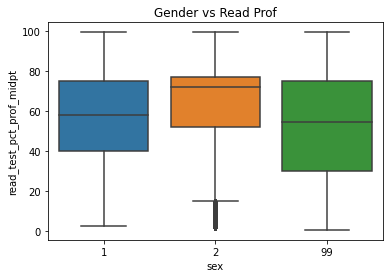

In [156]:
sns.boxplot(x='sex', y = 'read_test_pct_prof_midpt', data = cleaned_df) 
plt.title("Gender vs Reading proficiency mid");
# 1 is male 
# 2 is female
# 99 is Total 

## Differences between Races in reading proficiency

'""\n1—White\n2—Black\n3—Hispanic\n4—Asian\n5—American Indian or Alaska Native\n6—Native Hawaiian or other Pacific Islander\n7—Two or more races\n8—Nonresident alien\n9—Unknown\n20—Other\n99—Total\n'

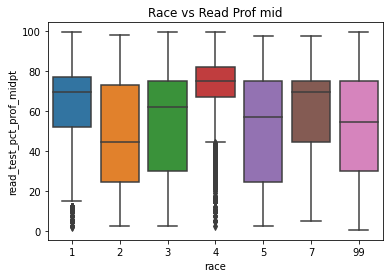

In [160]:
sns.boxplot(x='race', y = 'read_test_pct_prof_midpt', data = grade_12_df) 
plt.title("Race vs Read Prof mid");
"""""
1—White
2—Black
3—Hispanic
4—Asian
5—American Indian or Alaska Native
6—Native Hawaiian or other Pacific Islander
7—Two or more races
8—Nonresident alien
9—Unknown
20—Other
99—Total
"""""

In [155]:
# T-test Male and females 

#https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/
from   scipy import stats

## A simple t test for difference of means
t2, p2 = stats.ttest_ind(cleaned_df.loc[cleaned_df['sex'] == 1, 'read_test_pct_prof_midpt']
                         ,cleaned_df.loc[cleaned_df['sex'] == 2, 'read_test_pct_prof_midpt'])

print("Reading Test are the Same for Male and females")
print("t = " + str(t2))
print("p = " + str(p2))


Reading Test are the Same for Male and females
t = -357.4112512352197
p = 0.0


In [180]:
cleaned_df["total_spend_per_student"] = cleaned_df[ "exp_total"] / cleaned_df[ "enrollment_fall_responsible"]
cleaned_df["instruction_spend_per_student"] = cleaned_df[ "exp_current_instruction_total"] / cleaned_df[ "enrollment_fall_responsible"]
cleaned_df.head()

,year,leaid,lea_name,state_leaid,state_location,zip_location,fips,county_code,county_name,latitude,...,grade,enrollment,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible,total_spend_per_student,instruction_total_spend_per_student,instruction_spend_per_student
0,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,7,0.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0,16145.862553,8653.927069,8653.927069
1,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,8,1.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0,16145.862553,8653.927069,8653.927069
2,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,9,748.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0,16145.862553,8653.927069,8653.927069
3,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,10,714.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0,16145.862553,8653.927069,8653.927069
4,2009,1703870,CHSD 117,34-049-1170-16,IL,60046.0,17.0,17097.0,LAKE COUNTY,42.445301,...,11,700.0,1.450490e+13,51238000.0,46048000.0,24681000.0,2852.0,16145.862553,8653.927069,8653.927069


In [ ]:
# Instructional Spend Box Plot

sns.boxplot(x='race', y = 'read_test_pct_prof_midpt', data = cleaned_df) 
plt.title("Race vs Read Prof mid");


## Correlation matrix

To find the variables that have the greatest influence on read_test_pct_prof_midpt, we can compute a <b>correlation matrix</b> which measures the pairwise correlations between any two variables:

In [181]:
corr_mat  = cleaned_df[[ "total_spend_per_student", "instruction_spend_per_student" ,'grade_edfacts', 'race', 'sex', 'lep', 'homeless', 'migrant', 'disability', 'econ_disadvantaged','read_test_num_valid', 'read_test_pct_prof_low', 'read_test_pct_prof_high', 'read_test_pct_prof_midpt', 'math_test_num_valid', 'math_test_pct_prof_low', 'math_test_pct_prof_high', 'math_test_pct_prof_midpt']].corr()
corr_mat

,total_spend_per_student,instruction_spend_per_student,grade_edfacts,race,sex,lep,homeless,migrant,disability,econ_disadvantaged,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
total_spend_per_student,1.000000,0.921097,-0.010266,-0.003407,-0.002883,-0.009401,-0.004969,-0.004338,0.012343,0.001056,0.009629,0.037878,0.010194,0.026117,0.009503,0.044711,0.019102,0.034322
instruction_spend_per_student,0.921097,1.000000,-0.010186,-0.002933,-0.003202,-0.008902,-0.004960,-0.004188,0.012045,0.001307,0.009316,0.048941,0.024594,0.039742,0.009142,0.055147,0.032833,0.047209
grade_edfacts,-0.010266,-0.010186,1.000000,-0.048164,0.044431,-0.034163,-0.052423,-0.029450,-0.011924,0.027559,0.164875,0.035864,-0.084024,-0.024451,0.165380,0.023435,-0.093705,-0.036544
race,-0.003407,-0.002933,-0.048164,1.000000,-0.400436,-0.125712,-0.091314,-0.045671,-0.219537,-0.257584,0.015865,-0.086463,-0.136444,-0.119034,0.015942,-0.073316,-0.121060,-0.103466
sex,-0.002883,-0.003202,0.044431,-0.400436,1.000000,-0.113733,-0.082613,-0.041319,-0.198618,-0.233040,-0.001053,-0.153708,-0.105986,-0.139910,-0.001025,-0.131625,-0.083292,-0.115271
lep,-0.009401,-0.008902,-0.034163,-0.125712,-0.113733,1.000000,-0.025935,-0.012972,-0.062354,-0.073160,0.013597,0.165846,0.117212,0.152458,0.013251,0.106657,0.059573,0.089241
homeless,-0.004969,-0.004960,-0.052423,-0.091314,-0.082613,-0.025935,1.000000,-0.009422,-0.045292,-0.053142,0.020644,0.111975,0.039465,0.082107,0.020621,0.105404,0.033858,0.075040
migrant,-0.004338,-0.004188,-0.029450,-0.045671,-0.041319,-0.012972,-0.009422,1.000000,-0.022653,-0.026579,0.010539,0.036339,-0.003267,0.018207,0.010703,0.027417,-0.012193,0.008477
disability,0.012343,0.012045,-0.011924,-0.219537,-0.198618,-0.062354,-0.045292,-0.022653,1.000000,-0.127763,0.040302,0.330492,0.247366,0.311053,0.040295,0.280782,0.194832,0.254915
econ_disadvantaged,0.001056,0.001307,0.027559,-0.257584,-0.233040,-0.073160,-0.053142,-0.026579,-0.127763,1.000000,-0.003484,0.033258,0.059462,0.049451,-0.003244,0.046234,0.071133,0.062508


Text(0.5, 1.0, 'Correlation Matrix')

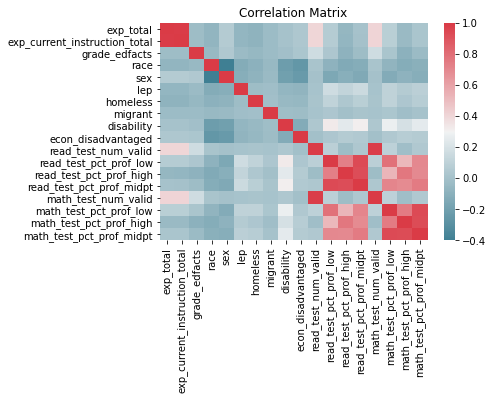

In [177]:
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

## Using linear models to account for variables correlated with reading proficiency

Once we identify some independent variables that are correlated with the dependent variable, a linear model can be used to capture this relationship quantitatively. A linear model does this by finding a line that [**best fits**](https://mathbits.com/MathBits/TISection/Statistics1/LineFit.htm) the data points:

Text(3.799999999999997, 0.5, 'read_test_pct_prof_midpt')

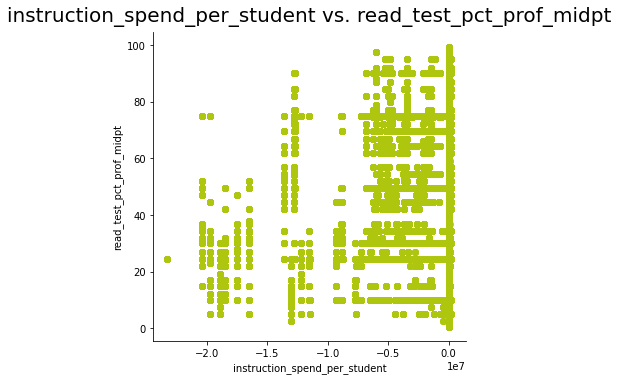

In [182]:
sns.lmplot(x = 'instruction_spend_per_student', y = 'read_test_pct_prof_midpt', data = cleaned_df, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("instruction_spend_per_student vs. read_test_pct_prof_midpt", fontsize=20, verticalalignment='bottom')
plt.xlabel("instruction_spend_per_student")
plt.ylabel("read_test_pct_prof_midpt")

## OLS Model for Reading proficiency only Grade 12

In [120]:
grade_12_df = cleaned_df[cleaned_df["grade"] == 12]
x = grade_12_df[['lep', 'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected','race',"sex",'exp_current_instruction_total']]  # add more explanatory variables; 
y = grade_12_df['read_test_pct_prof_midpt']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     read_test_pct_prof_low   R-squared:                       0.193
Model:                                OLS   Adj. R-squared:                  0.193
Method:                     Least Squares   F-statistic:                 2.108e+04
Date:                    Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                            16:05:23   Log-Likelihood:            -3.2251e+06
No. Observations:                  705839   AIC:                         6.450e+06
Df Residuals:                      705830   BIC:                         6.450e+06
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
lep                               0.3412      0.002    199.929      0.000       0.338       0.345
homeless                          0.3307      0.002    150.998      0.000       0.326       0.335
migrant                           0.2543      0.004     62.282      0.000       0.246       0.262
disability                        0.3636      0.001    308.708      0.000       0.361       0.366
econ_disadvantaged                0.1160      0.001    106.191      0.000       0.114       0.118
foster_care                      -0.4659      0.003   -137.417      0.000      -0.473      -0.459
military_connected               -0.4659      0.003   -137.417      0.000      -0.473      -0.459
race                              0.0673      0.001     72.202      0.000       0.065       0.069
sex                               0.0248      0.001     26.246      0.000       0.023       0.027
exp_current_instruction_total  3.147e-08   3.75e-10     83.989      0.000    3.07e-08    3.22e-08
==============================================================================
Omnibus:                    13715.560   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13755.966
Skew:                          -0.320   Prob(JB):                         0.00
Kurtosis:                       2.757   Cond. No.                     9.42e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.15e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## OLS Model for Reading proficiency only (math excluded)

In [117]:
x = cleaned_df[['lep', 'homeless', 'migrant', 'disability', 
                'econ_disadvantaged', 'foster_care', 
                'military_connected','race',"sex",
                'exp_current_instruction_total']]  

y = cleaned_df['read_test_pct_prof_midpt']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     read_test_pct_prof_midpt   R-squared:                       0.151
Model:                                  OLS   Adj. R-squared:                  0.151
Method:                       Least Squares   F-statistic:                 2.370e+05
Date:                      Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                              16:04:05   Log-Likelihood:            -4.8055e+07
No. Observations:                  10667472   AIC:                         9.611e+07
Df Residuals:                      10667463   BIC:                         9.611e+07
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
lep                               0.2539      0.000    616.244      0.000       0.253       0.255
homeless                          0.2046      0.001    380.972      0.000       0.204       0.206
migrant                           0.1233      0.001    121.375      0.000       0.121       0.125
disability                        0.2850      0.000   1002.544      0.000       0.284       0.286
econ_disadvantaged                0.0871      0.000    331.420      0.000       0.087       0.088
foster_care                      -0.1755      0.001   -212.325      0.000      -0.177      -0.174
military_connected               -0.1755      0.001   -212.325      0.000      -0.177      -0.174
race                              0.0140      0.000     62.579      0.000       0.014       0.014
sex                              -0.0002      0.000     -1.079      0.281      -0.001       0.000
exp_current_instruction_total  6.798e-09   9.22e-11     73.696      0.000    6.62e-09    6.98e-09
==============================================================================
Omnibus:                   716112.220   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           313537.481
Skew:                          -0.211   Prob(JB):                         0.00
Kurtosis:                       2.274   Cond. No.                     3.94e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.22e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
# getting one single year to better understand how the model is working
finance_2015_df = finance_df[finance_df.year == 2015]

In [31]:
# getting one single year to better understand how the model is working
finance_2015_df.head(5)

,year,leaid,fips,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
369234,2015,0100002,1.0,-2.000000e+00,-1.0,-1.0,-1.0,-1.0
369235,2015,0100005,1.0,1.504840e+12,49795000.0,46778000.0,24173000.0,5214.0
369236,2015,0100006,1.0,1.504800e+12,56422000.0,64739000.0,27425000.0,5635.0
369237,2015,0100007,1.0,1.503740e+12,168040000.0,165436000.0,91782000.0,13910.0
369238,2015,0100008,1.0,1.504530e+12,105927000.0,101154000.0,55315000.0,10011.0


In [32]:
# getting one single year to better understand how the model is working
edfacts_2015_df.head(5)

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,homeless,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,100005,100005,2015,Albertville City,1,99,99,99,99,99,...,99,99,2592.0,33.0,33.0,33.0,2638.0,42.0,42.0,42.0
1,100005,100005,2015,Albertville City,1,99,5,99,99,99,...,99,99,4.0,-3.0,-3.0,-3.0,5.0,-3.0,-3.0,-3.0
2,100005,100005,2015,Albertville City,1,99,4,99,99,99,...,99,99,12.0,50.0,100.0,75.0,12.0,50.0,100.0,75.0
3,100005,100005,2015,Albertville City,1,99,2,99,99,99,...,99,99,73.0,15.0,19.0,17.0,74.0,20.0,24.0,22.0
4,100005,100005,2015,Albertville City,1,99,99,99,99,99,...,99,99,159.0,6.0,9.0,7.5,159.0,15.0,19.0,17.0


In [33]:
# this would be disagregated by race (ie, race is not 00)
edfacts_2015_by_race_df = edfacts_2015_df[(edfacts_2015_df['sex']== 99)
                                       & (edfacts_2015_df['lep']== 99)
                                      & (edfacts_2015_df['homeless']== 99)
                                      & (edfacts_2015_df['migrant']== 99)
                                      & (edfacts_2015_df['disability']== 99)
                                      & (edfacts_2015_df['econ_disadvantaged']== 99)
                                      & (edfacts_2015_df['foster_care']== 99)
                                      & (edfacts_2015_df['military_connected']== 99) 
                                       & (edfacts_2015_df['grade_edfacts']== 99)]

edfacts_2015_without_total_race_df = edfacts_2015_by_race_df[edfacts_2015_by_race_df['race'] != 99]
edfacts_2015_without_total_race_df.head(20)

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,homeless,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
1,100005,100005,2015,Albertville City,1,99,5,99,99,99,...,99,99,4.0,-3.0,-3.0,-3.0,5.0,-3.0,-3.0,-3.0
2,100005,100005,2015,Albertville City,1,99,4,99,99,99,...,99,99,12.0,50.0,100.0,75.0,12.0,50.0,100.0,75.0
3,100005,100005,2015,Albertville City,1,99,2,99,99,99,...,99,99,73.0,15.0,19.0,17.0,74.0,20.0,24.0,22.0
7,100005,100005,2015,Albertville City,1,99,3,99,99,99,...,99,99,1120.0,23.0,23.0,23.0,1163.0,34.0,34.0,34.0
12,100005,100005,2015,Albertville City,1,99,7,99,99,99,...,99,99,61.0,35.0,39.0,37.0,61.0,40.0,44.0,42.0
13,100005,100005,2015,Albertville City,1,99,1,99,99,99,...,99,99,1318.0,42.0,42.0,42.0,1317.0,50.0,50.0,50.0
108,100006,100006,2015,Marshall County,1,99,5,99,99,99,...,99,99,16.0,40.0,59.0,49.5,16.0,21.0,39.0,30.0
109,100006,100006,2015,Marshall County,1,99,4,99,99,99,...,99,99,13.0,0.0,49.0,24.5,13.0,0.0,49.0,24.5
110,100006,100006,2015,Marshall County,1,99,2,99,99,99,...,99,99,38.0,20.0,29.0,24.5,38.0,11.0,19.0,15.0
114,100006,100006,2015,Marshall County,1,99,3,99,99,99,...,99,99,625.0,21.0,21.0,21.0,641.0,36.0,36.0,36.0


### For the output above, we see that if the number of valid tests taken is larger than 300, we get the actual percentage of students that scored proficient. If it is smaller than 300, it gets bucketed into ranges for anonimization.

In [34]:
from collections import defaultdict

In [35]:
edfacts_by_race_df = [edfacts_2009_df, edfacts_2010_df, edfacts_2011_df, edfacts_2012_df,
                         edfacts_2013_df, edfacts_2014_df, edfacts_2015_df, edfacts_2016_df,
                         edfacts_2017_df]

edfacts_df_dict = defaultdict(list)
i = 2009
for df in edfacts_by_race_df:
    new_df_name = df[(df['sex']== 99)
                                       & (df['lep']== 99)
                                      & (df['homeless']== 99)
                                      & (df['migrant']== 99)
                                      & (df['disability']== 99)
                                      & (df['econ_disadvantaged']== 99)
                                      & (df['foster_care']== 99)
                                      & (df['military_connected']== 99) 
                                       & (df['grade_edfacts']== 99)]
    edfacts_df_dict[i] = new_df_name
    i += 1


In [36]:
edfacts_df_dict.keys()

dict_keys([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [37]:
edfacts_2015_race_df = edfacts_df_dict[2015]
edfacts_2015_race_df.head()

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,homeless,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,100005,100005,2015,Albertville City,1,99,99,99,99,99,...,99,99,2592.0,33.0,33.0,33.0,2638.0,42.0,42.0,42.0
1,100005,100005,2015,Albertville City,1,99,5,99,99,99,...,99,99,4.0,-3.0,-3.0,-3.0,5.0,-3.0,-3.0,-3.0
2,100005,100005,2015,Albertville City,1,99,4,99,99,99,...,99,99,12.0,50.0,100.0,75.0,12.0,50.0,100.0,75.0
3,100005,100005,2015,Albertville City,1,99,2,99,99,99,...,99,99,73.0,15.0,19.0,17.0,74.0,20.0,24.0,22.0
7,100005,100005,2015,Albertville City,1,99,3,99,99,99,...,99,99,1120.0,23.0,23.0,23.0,1163.0,34.0,34.0,34.0


In [38]:
edfacts_2015_race_df['read_test_num_valid'].describe()

count     97211.000000
mean        534.819619
std        3035.868104
min           0.000000
25%           5.000000
50%          36.000000
75%         276.000000
max      270731.000000
Name: read_test_num_valid, dtype: float64

0          2592.0
1             4.0
2            12.0
3            73.0
7          1120.0
            ...  
1236365       7.0
1236366    3147.0
1236370     419.0
1236373      31.0
1236374      75.0
Name: read_test_num_valid, Length: 97606, dtype: float64

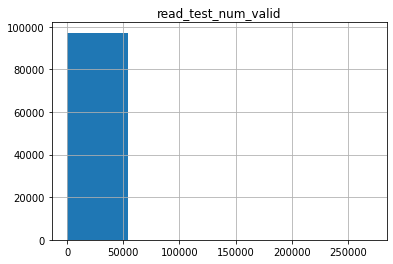

In [39]:
edfacts_2015_race_df['read_test_num_valid'].describe()
edfacts_2015_race_df.hist(column='read_test_num_valid', bins=5)
edfacts_2015_race_df['read_test_num_valid']

array([[<AxesSubplot:title={'center':'read_test_num_valid'}>]],
      dtype=object)

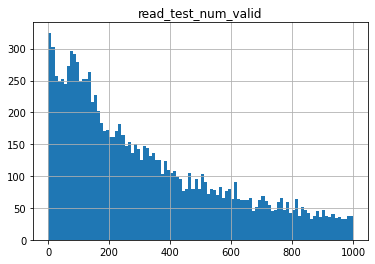

In [40]:
edfacts_2015_race_df_drop_read_outlier = edfacts_2015_race_df[(edfacts_2015_race_df['read_test_num_valid'] < float('1000')) 
                                                              & (edfacts_2015_race_df['race'] == 99)]
edfacts_2015_race_df_drop_read_outlier['read_test_num_valid'].describe()
edfacts_2015_race_df_drop_read_outlier.hist(column='read_test_num_valid', bins=100)

In [41]:
# removing all negative entries, which means data is supressed (-1), not applicable (-2), or missing (-3)
# we are only focusing on districts w/ over 100 students

finance_by_year_df = [edfacts_2009_df, edfacts_2010_df, edfacts_2011_df, edfacts_2012_df,
                         edfacts_2013_df, edfacts_2014_df, edfacts_2015_df, edfacts_2016_df,
                         edfacts_2017_df]

my_values = defaultdict(list)
i = 2009
for df in edfacts_by_race_df:
    new_df_name = df[(df['sex']== 99)
                                       & (df['lep']== 99)
                                      & (df['homeless']== 99)
                                      & (df['migrant']== 99)
                                      & (df['disability']== 99)
                                      & (df['econ_disadvantaged']== 99)
                                      & (df['foster_care']== 99)
                                      & (df['military_connected']== 99) 
                                       & (df['grade_edfacts']== 99)]
    my_values[i] = new_df_name
    i += 1



finance_2015_clean_df1 = finance_2015_df[(finance_2015_df['rev_total'] > 0) 
                                       & (finance_2015_df['exp_total'] > 0)
                                       & (finance_2015_df['exp_current_instruction_total']> 0)
                                      & (finance_2015_df['enrollment_fall_responsible'] > 100)]

In [42]:
finance_2015_clean_df1.head(5)

,year,leaid,fips,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
369235,2015,0100005,1.0,1.504840e+12,49795000.0,46778000.0,24173000.0,5214.0
369236,2015,0100006,1.0,1.504800e+12,56422000.0,64739000.0,27425000.0,5635.0
369237,2015,0100007,1.0,1.503740e+12,168040000.0,165436000.0,91782000.0,13910.0
369238,2015,0100008,1.0,1.504530e+12,105927000.0,101154000.0,55315000.0,10011.0
369240,2015,0100011,1.0,1.503710e+12,27699000.0,32285000.0,9932000.0,1905.0


In [43]:
finance_2015_clean_df1.sort_values(by = 'enrollment_fall_responsible', ascending=True)

,year,leaid,fips,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
383755,2015,4200048,42.0,-2.000000e+00,1.915000e+06,1.930000e+06,7.950000e+05,101.0
385642,2015,4822620,48.0,4.452440e+13,1.616000e+06,1.508000e+06,8.280000e+05,101.0
383219,2015,4016320,40.0,3.750210e+13,1.031000e+06,1.151000e+06,5.880000e+05,101.0
372236,2015,1100102,11.0,-2.000000e+00,2.702000e+06,5.514000e+06,1.050000e+06,101.0
385198,2015,4801404,48.0,-2.000000e+00,1.980000e+06,1.793000e+06,9.130000e+05,101.0
...,...,...,...,...,...,...,...,...
379018,2015,3200060,32.0,2.950020e+13,3.220684e+09,3.081183e+09,1.646168e+09,325990.0
372256,2015,1200390,12.0,1.050130e+13,3.590773e+09,3.654722e+09,2.055410e+09,357579.0
373084,2015,1709930,17.0,1.450162e+13,5.272668e+09,5.963039e+09,3.612722e+09,387311.0
371138,2015,0622710,6.0,5.501906e+12,1.032938e+10,9.686165e+09,4.949740e+09,639337.0


In [44]:
# removing all negative entries, which means data is supressed (-1), not applicable (-2), or missing (-3)
edfacts_2015_clean_df1 = edfacts_2015_race_df[(edfacts_2015_race_df['read_test_pct_prof_low'] > 0) 
                                       | (edfacts_2015_race_df['read_test_pct_prof_high'] > 0)
                                       | (edfacts_2015_race_df['read_test_pct_prof_midpt']> 0)
                                      | (edfacts_2015_race_df['math_test_pct_prof_low'] > 0)
                                      | (edfacts_2015_race_df['math_test_pct_prof_high'] > 0)
                                      | (edfacts_2015_race_df['math_test_pct_prof_midpt'] > 0)]

In [45]:
edfacts_2015_clean_df1.head(5)

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,homeless,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,100005,100005,2015,Albertville City,1,99,99,99,99,99,...,99,99,2592.0,33.0,33.0,33.0,2638.0,42.0,42.0,42.0
2,100005,100005,2015,Albertville City,1,99,4,99,99,99,...,99,99,12.0,50.0,100.0,75.0,12.0,50.0,100.0,75.0
3,100005,100005,2015,Albertville City,1,99,2,99,99,99,...,99,99,73.0,15.0,19.0,17.0,74.0,20.0,24.0,22.0
7,100005,100005,2015,Albertville City,1,99,3,99,99,99,...,99,99,1120.0,23.0,23.0,23.0,1163.0,34.0,34.0,34.0
12,100005,100005,2015,Albertville City,1,99,7,99,99,99,...,99,99,61.0,35.0,39.0,37.0,61.0,40.0,44.0,42.0


In [46]:
df_2015_clean = pd.merge(finance_2015_clean_df1, edfacts_2015_clean_df1, on = "leaid", how = "inner")

In [47]:
df_2015_clean.head(5)

,year_x,leaid,fips_x,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible,leaid_num,year_y,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,2015,2635550,26.0,2.350031e+13,34126000.0,31529000.0,16274000.0,2944.0,2635550,2015,...,99,99,1459.0,54.0,54.0,54.0,1454.0,50.0,50.0,50.0
1,2015,2635550,26.0,2.350031e+13,34126000.0,31529000.0,16274000.0,2944.0,2635550,2015,...,99,99,26.0,40.0,59.0,49.5,26.0,40.0,59.0,49.5
2,2015,2635550,26.0,2.350031e+13,34126000.0,31529000.0,16274000.0,2944.0,2635550,2015,...,99,99,19.0,40.0,59.0,49.5,19.0,60.0,79.0,69.5
3,2015,2635550,26.0,2.350031e+13,34126000.0,31529000.0,16274000.0,2944.0,2635550,2015,...,99,99,15.0,0.0,49.0,24.5,15.0,0.0,49.0,24.5
4,2015,2635550,26.0,2.350031e+13,34126000.0,31529000.0,16274000.0,2944.0,2635550,2015,...,99,99,70.0,35.0,39.0,37.0,70.0,30.0,34.0,32.0


In [48]:
print(df_2015_clean.columns.tolist())

['year_x', 'leaid', 'fips_x', 'censusid', 'rev_total', 'exp_total', 'exp_current_instruction_total', 'enrollment_fall_responsible', 'leaid_num', 'year_y', 'lea_name', 'fips_y', 'grade_edfacts', 'race', 'sex', 'lep', 'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected', 'read_test_num_valid', 'read_test_pct_prof_low', 'read_test_pct_prof_high', 'read_test_pct_prof_midpt', 'math_test_num_valid', 'math_test_pct_prof_low', 'math_test_pct_prof_high', 'math_test_pct_prof_midpt']


In [49]:
df_2015_clean_dropna = df_2015_clean.dropna()

In [50]:
#print(df_2015_clean_dropna)

In [51]:
# X = inputs for prediction; Y = what we are predicting
x = df_2015_clean_dropna['exp_current_instruction_total']
y = df_2015_clean_dropna['read_test_pct_prof_high']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     read_test_pct_prof_high   R-squared:                       0.004
Model:                                 OLS   Adj. R-squared:                  0.004
Method:                      Least Squares   F-statistic:                     54.47
Date:                     Sat, 06 Feb 2021   Prob (F-statistic):           1.67e-13
Time:                             14:50:53   Log-Likelihood:                -57655.
No. Observations:                    12641   AIC:                         1.153e+05
Df Residuals:                        12639   BIC:                         1.153e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            59.8494      0.225    265.773      0.000      59.408      60.291
exp_current_instruction_total -2.747e-08   3.72e-09     -7.381      0.000   -3.48e-08   -2.02e-08
==============================================================================
Omnibus:                      196.877   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.299
Skew:                           0.105   Prob(JB):                     3.75e-28
Kurtosis:                       2.557   Cond. No.                     6.62e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

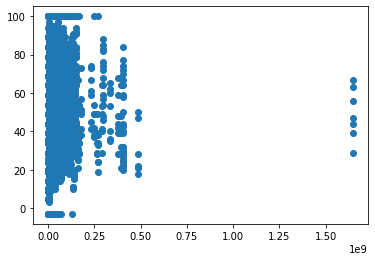

In [52]:
plt.scatter(df_2015_clean_dropna['exp_current_instruction_total'], df_2015_clean_dropna['read_test_pct_prof_high'])

In [53]:
#check the outlier and drop it
df_2015_clean_dropna.sort_values(by='exp_current_instruction_total', ascending=False)


,year_x,leaid,fips_x,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible,leaid_num,year_y,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
6251,2015,3200060,32.0,2.950020e+13,3.220684e+09,3.081183e+09,1.646168e+09,325990.0,3200060,2015,...,99,99,40116.0,63.0,63.0,63.0,42680.0,52.0,52.0,52.0
6250,2015,3200060,32.0,2.950020e+13,3.220684e+09,3.081183e+09,1.646168e+09,325990.0,3200060,2015,...,99,99,10223.0,56.0,56.0,56.0,10780.0,43.0,43.0,43.0
6249,2015,3200060,32.0,2.950020e+13,3.220684e+09,3.081183e+09,1.646168e+09,325990.0,3200060,2015,...,99,99,75196.0,39.0,39.0,39.0,79400.0,29.0,29.0,29.0
6248,2015,3200060,32.0,2.950020e+13,3.220684e+09,3.081183e+09,1.646168e+09,325990.0,3200060,2015,...,99,99,22558.0,29.0,29.0,29.0,23893.0,21.0,21.0,21.0
6247,2015,3200060,32.0,2.950020e+13,3.220684e+09,3.081183e+09,1.646168e+09,325990.0,3200060,2015,...,99,99,12402.0,67.0,67.0,67.0,13023.0,57.0,57.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,2015,2912480,29.0,2.650360e+13,1.311000e+06,1.131000e+06,4.530000e+05,116.0,2912480,2015,...,99,99,45.0,90.0,100.0,95.0,45.0,70.0,79.0,74.5
3508,2015,2912480,29.0,2.650360e+13,1.311000e+06,1.131000e+06,4.530000e+05,116.0,2912480,2015,...,99,99,45.0,90.0,100.0,95.0,45.0,70.0,79.0,74.5
10255,2015,3500133,35.0,-2.000000e+00,1.195000e+06,1.043000e+06,4.060000e+05,110.0,3500133,2015,...,99,99,39.0,30.0,39.0,34.5,39.0,11.0,19.0,15.0
10254,2015,3500133,35.0,-2.000000e+00,1.195000e+06,1.043000e+06,4.060000e+05,110.0,3500133,2015,...,99,99,108.0,40.0,44.0,42.0,108.0,30.0,34.0,32.0


In [54]:
df_2015_clean_drop_outlier = df_2015_clean_dropna[df_2015_clean_dropna['exp_current_instruction_total'] < float('1.646168e+09')]

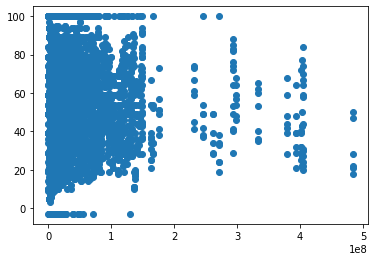

In [55]:
plt.scatter(df_2015_clean_drop_outlier['exp_current_instruction_total'], df_2015_clean_drop_outlier['read_test_pct_prof_high'])

In [56]:
# create new column with per capita instructional expenditure per student
df_2015_clean_drop_outlier['instructional_exp_per_student'] = df_2015_clean_drop_outlier['exp_current_instruction_total'] / df_2015_clean_drop_outlier['enrollment_fall_responsible']

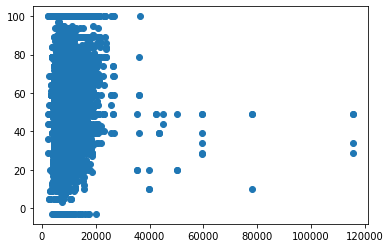

In [57]:
plt.scatter(df_2015_clean_drop_outlier['instructional_exp_per_student'], df_2015_clean_drop_outlier['read_test_pct_prof_high'])

In [58]:
# what we see here -1.0 is not really a negative number it is $100M

In [59]:
df_2015_clean_drop_outlier['enrollment_fall_responsible'].describe()

count    12634.000000
mean      2698.224632
std       4877.560672
min        101.000000
25%        516.000000
50%       1237.000000
75%       3064.000000
max      90566.000000
Name: enrollment_fall_responsible, dtype: float64

In [60]:

df_2015_clean_drop_outlier.sort_values(by = 'enrollment_fall_responsible', ascending=True)

,year_x,leaid,fips_x,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible,leaid_num,year_y,...,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt,instructional_exp_per_student
4108,2015,2922470,29.0,2.651060e+13,1.609000e+06,1.608000e+06,856000.0,101.0,2922470,2015,...,99,49.0,40.0,49.0,44.5,50.0,50.0,59.0,54.5,8475.247525
5037,2015,3008880,30.0,2.750320e+13,1.635000e+06,1.607000e+06,809000.0,101.0,3008880,2015,...,99,64.0,35.0,39.0,37.0,64.0,30.0,34.0,32.0,8009.900990
4110,2015,2922470,29.0,2.651060e+13,1.609000e+06,1.608000e+06,856000.0,101.0,2922470,2015,...,99,42.0,40.0,49.0,44.5,42.0,50.0,59.0,54.5,8475.247525
5038,2015,3008880,30.0,2.750320e+13,1.635000e+06,1.607000e+06,809000.0,101.0,3008880,2015,...,99,8.0,50.0,100.0,75.0,8.0,0.0,49.0,24.5,8009.900990
4109,2015,2922470,29.0,2.651060e+13,1.609000e+06,1.608000e+06,856000.0,101.0,2922470,2015,...,99,5.0,-3.0,-3.0,-3.0,7.0,0.0,49.0,24.5,8475.247525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,2015,3500060,35.0,3.250010e+13,1.021201e+09,1.037039e+09,483585000.0,90566.0,3500060,2015,...,99,2947.0,18.0,18.0,18.0,2915.0,11.0,11.0,11.0,5339.586600
10145,2015,3500060,35.0,3.250010e+13,1.021201e+09,1.037039e+09,483585000.0,90566.0,3500060,2015,...,99,1415.0,50.0,50.0,50.0,1384.0,47.0,47.0,47.0,5339.586600
10146,2015,3500060,35.0,3.250010e+13,1.021201e+09,1.037039e+09,483585000.0,90566.0,3500060,2015,...,99,1509.0,21.0,21.0,21.0,1506.0,12.0,12.0,12.0,5339.586600
10147,2015,3500060,35.0,3.250010e+13,1.021201e+09,1.037039e+09,483585000.0,90566.0,3500060,2015,...,99,38777.0,22.0,22.0,22.0,38341.0,15.0,15.0,15.0,5339.586600


In [61]:
# X = inputs for prediction; Y = what we are predicting
x = df_2015_clean_drop_outlier['exp_current_instruction_total']
y = df_2015_clean_drop_outlier['read_test_pct_prof_high']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     read_test_pct_prof_high   R-squared:                       0.007
Model:                                 OLS   Adj. R-squared:                  0.006
Method:                      Least Squares   F-statistic:                     83.30
Date:                     Sat, 06 Feb 2021   Prob (F-statistic):           8.12e-20
Time:                             14:50:55   Log-Likelihood:                -57610.
No. Observations:                    12634   AIC:                         1.152e+05
Df Residuals:                        12632   BIC:                         1.152e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            60.2881      0.239    252.463      0.000      59.820      60.756
exp_current_instruction_total -4.687e-08   5.14e-09     -9.127      0.000   -5.69e-08   -3.68e-08
==============================================================================
Omnibus:                      187.365   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.550
Skew:                           0.094   Prob(JB):                     1.10e-26
Kurtosis:                       2.562   Cond. No.                     5.40e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

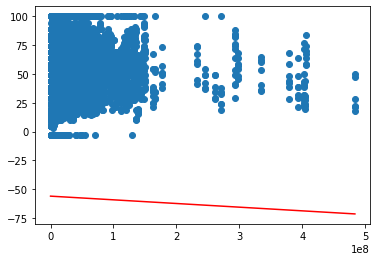

In [62]:
x = df_2015_clean_drop_outlier['exp_current_instruction_total'].tolist() 
y = df_2015_clean_drop_outlier['read_test_pct_prof_high'].tolist() 
plt.scatter(x, y) 
  
# finding the maximum and minimum 
# values of x, to get the 
# range of data 
max_x = df_2015_clean_drop_outlier['exp_current_instruction_total'].max() 
min_x = df_2015_clean_drop_outlier['read_test_pct_prof_high'].min() 
  
# range of values for plotting 
# the regression line 
x = np.arange(min_x, max_x, 1) 
  
# the substituted equation 
y = -3.186e-08 * x - 55.9731
  
# plotting the regression line 
plt.plot(y, 'r') 
plt.show() 

## Open questions:
- I'm failing to add race. Not sure what needs to be done before I can use it since it is a categorical variable
- Need to decide on the features we want (correlation amongst them?)

## Features:
- From Finance:
    - All the dollar amounts here are highly correlated; we likely don't want to get rid of them but they will be highly correlated. We can devide exp_current_instruction total by exp_total to decouple it from the total amount.
    - 'rev_total' - Numerical/measurement
    - 'exp_total'  - Numerical/measurement 
    - 'exp_current_instruction_total' - Numerical/measurement 
    - 'enrollment_fall_responsible' - Numerical/measurement   - get per capita measure on $ spend
    
- From Directory: For this we should be able to recode
    - 'urban_centric_locale': - categorical
        1—Large city = city
        2—Midsize city = city
        3—Urban fringe of large city = city
        4—Urban fringe of midsize city = city
        5—Large town = town
        6—Small town = town
        7—Rural, outside CBSA = rural
        8—Rural, inside CBSA  = rural
        9—Not assigned
        11—City, large = city
        12—City, midsize = city
        13—City, small = city
        21—Suburb, large = suburb
        22—Suburb, midsize = suburb
        23—Suburb, small = suburb
        31—Town, fringe = town
        32—Town, distant = town
        33—Town, remote = town
        41—Rural, fringe = rural
        42—Rural, distant = rural
        43—Rural, remote = rural
        
- From edfacts: 
        'grade_edfacts' -  --> Ask OhKyu about this one. For this one, the recommendation is to limit it to school districts with the same grades, otherwise, it will introduce bias. We have to try if the better prediction is by grade (potentially more noisy, and lower grades may be less predictive) or by total. REgardless of which one we chose, we need to be consistent
        'race', 'sex', 'lep', 
         'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected'
         
- From enrollment:
        - grade
        - race
        - sex 
        - enrollment
        
- Look into Kappa statistic (provides the percent of accordance and it substracts a number that it happened by chance) and chi-square test of independence (this would allow to compare more than two features). Even for categorical variables, a correlation would still get us a number

         

        



In [63]:
# eta-squared, or eta, as an effect-size measure for the relationship of a categorical variable and a continuous variable.
# -> categorical (multi) + continuous 

def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta

In [64]:
# This is for Pearson correlation, which may not be applicable for our type of variables. 

correlations = smokers[
    (smokers["charges"] >= charges.quantile(q=0.25))
    & (smokers["charges"] <= charges.quantile(q=0.75))
]
corr = central.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

NameError: name 'smokers' is not defined